<a href="https://colab.research.google.com/github/Noahbisht0/Machine-Learning-IBM-db2_sql/blob/main/AI12_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

In [ ]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22af5d31d0>]],
      dtype=object)

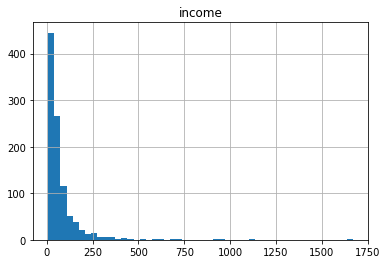

In [ ]:
df.hist("income",bins=50)

In [ ]:
df.columns.values

array(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'], dtype=object)

In [ ]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [ ]:
y = df[["custcat"]].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print("train shape: ",x_train.shape,y_train.shape)
print("test shape: ",x_test.shape,y_test.shape) 

train shape:  (800, 11) (800, 1)
test shape:  (200, 11) (200, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4 
knn = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
knn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(x_test)
pred[0:5]

array([1, 1, 3, 2, 4])

In [ ]:
from sklearn import metrics
print("train set accuracy: ",metrics.accuracy_score(y_train,knn.predict(x_train)))
print("test set accuracy: ",metrics.accuracy_score(y_test,pred))

train set accuracy:  0.5475
test set accuracy:  0.32


In [ ]:
ks = 10 
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for i in range(1,ks):
  niegh = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  yhat = niegh.predict(x_test)
  mean_acc[i-1] = metrics.accuracy_score(y_test,yhat) 
  std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

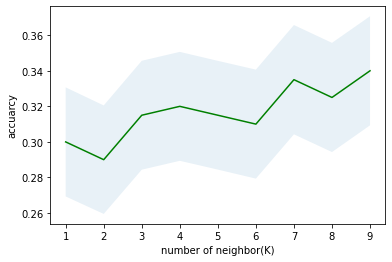

In [ ]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc,alpha=0.10)
plt.xlabel("number of neighbor(K)")
plt.ylabel("accuarcy")
plt.show()

In [ ]:
print("The best accuracy was with: ",mean_acc.max(),"with k = ",mean_acc.argmax()+1)

The best accuracy was with:  0.34 with k =  9
